## "Exploring the Power of PyTorch: Your Gateway to Cutting-Edge AI Innovation!"

This code imports the necessary modules for working with PyTorch, defining neural networks, handling datasets, and performing image transformations.


In [1]:
import torch      # Import the main PyTorch library

from torch import nn  # Import the neural network module from PyTorch

from torch.utils.data import dataloader  # Import the DataLoader class from PyTorch to handle batching of data

from torchvision import datasets # Import the datasets module from torchvision to access common datasets

from torchvision.transforms import ToTensor #Import the ToTensor transformation to convert images to tensor format

import matplotlib.pyplot as plt



**ToTensor format** : an image in tensor format is represented as a 3D tensor with dimensions (channels, height, width), where:

Channels: The number of color channels (e.g., 1 for grayscale, 3 for RGB).
Height: The number of pixels in the vertical direction.
Width: The number of pixels in the horizontal direction.

PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, all of which include datasets. For this tutorial, we will be using a TorchVision dataset.

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",                  #Specifies the directory where the dataset will be stored (or is already stored).
    train=True,
    download=True,
    transform=ToTensor()
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.7MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.96MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset


We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.



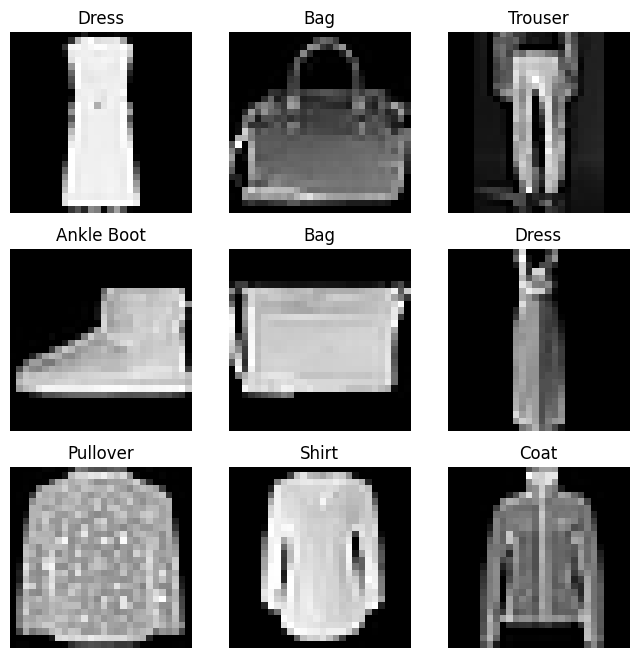

In [3]:
#it maps the label (which is a number from 0 to 9) to its corresponding clothing category
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}



figure = plt.figure(figsize = (8,8)) #figure with a size of 8x8 inches where images will be plotted.

#grid dimension
cols, rows = 3, 3 #The cols and rows define a 3x3 grid, meaning the code will display 9 images in total.

for i in range(1 , cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item() #Generates a random integer within the range [0, len(training_data)-1].
                                                                       #size=(1,): Specifies the shape of the output tensor (a single-element tensor in this case).
                                                                       #.item(): Converts the single-element tensor to a Python integer.


    img , label = training_data[sample_idx] #This retrieves an image and its corresponding label from the training_data at the randomly selected index

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])    #Maps the label (label) to its corresponding category name using labels_map.
    plt.axis("off")                 #Removes the x-axis and y-axis from the subplot, focusing only on the image.
    plt.imshow(img.squeeze(), cmap = "gray") #img.squeeze() = removes single dimensional entries
plt.show()


Creating a Custom Dataset for your files


A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file

In [4]:
import os                               #way to interact with the operating system.
import pandas as pd
from torchvision.io import read_image   #read_image is a utility function used to read an image file and load it as a PyTorch tensor.
from torch.utils.data import Dataset   # Import Dataset

class CustomImageDataset(Dataset):
  def __init__(self , annotation_file , img_dir , transform=None , target_transform = None):    # It initializes the dataset
    self.img_labels = pd.read_csv(annotation_file)                                              #self is a reference to the current instance of the class
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):    #The __len__ method returns the total number of samples in the dataset.
    return len(self.img_labels)

  def __getitem__(self , idx):  #The __getitem__ method is called to retrieve a specific sample (image and label) from the dataset based on the given index (idx).
    img_path: os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]


    #If a transformation function for images (transform) is provided, it is applied to the image.
    #If a transformation function for labels (target_transform) is provided, it is applied to the label.
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


## Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [5]:
from torch.utils.data import DataLoader #DataLoader: A PyTorch utility for loading datasets in an efficient manner.

train_dataloader = DataLoader(training_data , batch_size = 64 , shuffle = True)     #A dataset object, typically created using torchvision.datasets or a custom dataset class (like CustomImageDataset
test_dataloader = DataLoader(test_data , batch_size = 64 , shuffle = True)

# Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


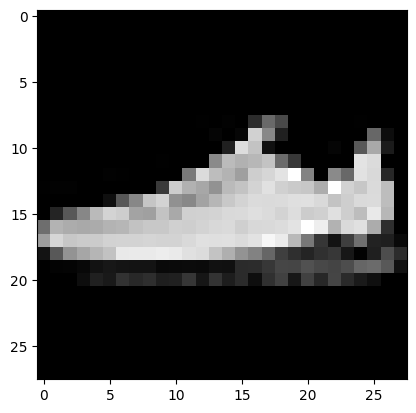

Label: 7


In [6]:
#to display an image from the training data and its corresponding label.

train_features, train_labels = next(iter(train_dataloader))   #this retrieves the next batch of data from the train_dataloader
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()                             #.squeeze(): This removes any dimensions of size 1. For example, if the image has the shape [1, 28, 28] (which means it's a grayscale image with 1 channel), .squeeze() will convert it to a 2D array of shape [28, 28] (removes the channel dimension)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### **Transforms**

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [7]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda

#ToTensor: A transformation that converts images to PyTorch tensors and scales pixel values from [0, 255] to [0.0, 1.0].
#Lambda: Allows you to define custom transformations using Python's lambda function or a custom callable.


ds = datasets.FashionMNIST(
    root = "data" , #Specifies the directory ("data") where the dataset will be downloaded and stored.
    train = True ,  #Indicates whether to load the training set (True) or the test set (False
    download = True , #f the dataset is not already present in the root directory, it will be downloaded automatically.
    transform = ToTensor() ,  # Image transformation : Converts the image to a PyTorch tensor and scales pixel values from [0, 255] (integers) to [0.0, 1.0] (floating point).

    target_transform = Lambda(lambda y : torch.zeros(10 , dtype = torch.float).scatter_(0 , torch.tensor(y) , value = 1))

    #Label Transformation: target_transform=Lambda(...)
    #Applies a custom transformation to the labels
    #One-Hot Encoding Logic torch.zeros(10, dtype=torch.float)

    #The .scatter_ function updates the tensor by placing a value (1) at a specified index (the label y).
    #Arguments: 0: The dimension along which to scatter (here, along the single dimension of the vector).
    #torch.tensor(y): The index where the value 1 will be placed.
    #value=1: The value to insert at the specified index.
  )

Lambda Transforms
Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

In [8]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

## Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In [9]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**Get Device for Training**


We want to be able to train our model on a hardware accelerator like the GPU or MPS, if available. Let’s check to see if torch.cuda or torch.backends.mps are available, otherwise we use the CPU.

In [10]:
device = (
    "cuda"  # CUDA-enabled GPU
    if torch.cuda.is_available()  # Check if a CUDA-capable GPU is available
    else "mps"  # Metal Performance Shaders for macOS
    if torch.backends.mps.is_available()  # Check if MPS is supported
    else "cpu"  # Default to CPU if no GPU options are available
)


Define the Class
**bold text**

We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [11]:
class NeuralNetwork(nn.Module): #NeuralNetwork: Defines the custom neural network class. nn.Module: Base class for all neural networks in PyTorch. By inheriting from nn.Module, your class can take advantage of PyTorch's built-in functionalities
    def __init__(self):         #__init__: The constructor initializes the layers and components of the neural network.
        super().__init__()      # Calls the constructor of the parent class (nn.Module) to initialize built-in properties.
        self.flatten = nn.Flatten() #Converts a multi-dimensional tensor into a 1D tensor, which is required for fully connected layers.

        self.linear_relu_stack = nn.Sequential(   #nn.Sequential: Combines multiple layers into a single pipeline.
            nn.Linear(28*28, 512),                # A fully connected (dense) layer with 784 input features (28x28 pixels) and 512 output features.
            nn.ReLU(),
            nn.Linear(512, 512),                  #Another fully connected layer, mapping 512 input features to 512 output features.
            nn.ReLU(),                            # ReLU activation for non-linearity.
            nn.Linear(512, 10),                   #A final fully connected layer mapping 512 features to 10 output features
        )

    def forward(self, x):     #Purpose: Defines the forward pass of the neural network,
        x = self.flatten(x)   #Flattens the input tensor
        logits = self.linear_relu_stack(x)  #Passes the flattened input through the sequential stack of layers.
        return logits

      #Flatten : Flattening an input tensor means converting its multi-dimensional structure into a single-dimensional (1D) vector. This transformation is often necessary before passing the data to fully connected layers

We create an instance of NeuralNetwork, and move it to the device, and print its structure.



In [12]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module

In [13]:
X = torch.rand(1, 28, 28, device=device)  #1: Batch size (1 image).  28, 28: Dimensions of the grayscale image (height × width).
logits = model(X)   #Passes the input tensor X through the neural network.
pred_probab = nn.Softmax(dim=1)(logits)  #Applies the softmax function along dim=1 (class dimension) to convert logits into probabilities.

y_pred = pred_probab.argmax(1)  #Finds the index of the maximum value (highest probability) along dim=1 (class dimension).
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3])


# Model Layers

Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network./


In [14]:
#Generates a tensor with random values sampled uniformly from the range [0, 1).
# Shape:
# 3: Represents 3 channels (e.g., RGB image channels: Red, Green, and Blue).
# 28, 28: Dimensions of the image (height × width).


input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


## nn.Flatten

We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [15]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


nn.linear

The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.



In [16]:

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.Linear


The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.



In [17]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU


Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.



In [18]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.2656, -0.2760,  0.3216,  0.7349, -0.2036, -0.1986,  0.2548, -0.2904,
         -0.0181, -0.3882,  0.4613,  0.2939,  0.5148,  0.7957,  0.2398,  0.0475,
          0.2289,  0.4614, -0.1487,  0.0892],
        [ 0.0573, -0.2764,  0.3165, -0.0457,  0.0597,  0.0850,  0.2382, -0.1147,
          0.2204, -0.4711,  0.2913, -0.1037,  0.3084,  0.0535,  0.2697,  0.0868,
          0.0529,  0.9342, -0.3401,  0.2202],
        [-0.2326,  0.1704,  0.5622, -0.0200, -0.2035, -0.0992,  0.3246,  0.1339,
         -0.1360, -0.1471,  0.3751,  0.1008,  0.7118,  0.4472,  0.3668, -0.1956,
          0.5070,  0.6951, -0.2238, -0.0111]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.3216, 0.7349, 0.0000, 0.0000, 0.2548, 0.0000, 0.0000,
         0.0000, 0.4613, 0.2939, 0.5148, 0.7957, 0.2398, 0.0475, 0.2289, 0.4614,
         0.0000, 0.0892],
        [0.0573, 0.0000, 0.3165, 0.0000, 0.0597, 0.0850, 0.2382, 0.0000, 0.2204,
         0.0000, 0.2913, 0.0000, 0.3084, 0.0535, 0.26

nn.Sequential


nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.



In [19]:
seq_modules = nn.Sequential(    #Combines multiple layers or operations into a single pipeline. Each operation is executed in sequence.
    flatten,              # Flattens the input tensor (e.g., from [batch_size, 28, 28] to [batch_size, 784]).
    layer1,               # A predefined layer or module (e.g., a fully connected layer).
    nn.ReLU(),            # Applies the ReLU activation function to introduce non-linearity.
    nn.Linear(20, 10)     # A linear layer that transforms inputs of size 20 into outputs of size 10.
)
input_image = torch.rand(3,28,28)     #Generates a random tensor with shape [3, 28, 28]  where 3 : batch_Size and 28*28 : dimensions of each image
logits = seq_modules(input_image)     #  The random tensor input_image is passed through the seq_modules model:


nn.Softmax


The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.




In [20]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

Model Parameters


Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.



In [23]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():      #Returns an iterator over the model’s learnable parameters. Each item is a tuple containing:
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")     #name: The parameter's name (e.g., weight or bias for a specific layer).
                                                                                # param: The parameter tensor itself.

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 5.5959e-03,  9.7222e-03,  1.4769e-02,  ..., -6.0110e-03,
         -3.1045e-02, -2.6030e-02],
        [-2.1888e-02,  5.1490e-05,  1.1945e-02,  ...,  8.6687e-03,
          3.5184e-02,  3.1080e-02]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0151, 0.0217], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0258,  0.0083, -0.0226,  ..., -0.0333,  0.0262,  0.0055],
        [-0.0339, -0.0407, -0.0128,  ...,  0.0202,  0.0003,  0.0381]],
       grad_

Automatic Differentiation with torch.autograd


When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

 **To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd.** It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [24]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tenso

In [25]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7c60073797b0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7c5ffa8d6710>


**Computing Gradients**

To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad:

In [26]:


loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0657, 0.1806, 0.3165],
        [0.0657, 0.1806, 0.3165],
        [0.0657, 0.1806, 0.3165],
        [0.0657, 0.1806, 0.3165],
        [0.0657, 0.1806, 0.3165]])
tensor([0.0657, 0.1806, 0.3165])


# Disabling Gradient Tracking


By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block

In [28]:
z = torch.matmul(x, w)+b        #Computes a matrix multiplication between x and w using torch.matmul, followed by adding the bias b. creates a new tensor z.
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## Optimizing Model Parameters


ow that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), and optimizes these parameters using gradient descent.

In [29]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates



We define the following hyperparameters for training:
Number of Epochs - the number times to iterate over the dataset

Batch Size - the number of data samples propagated through the network before the parameters are updated

Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [30]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimization Loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:
The Train Loop - iterate over the training dataset and try to converge to optimal parameters.

The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

Loss Function

When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.



In [31]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

## Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers  in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.


In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##Full Implementation


We define train_loop that loops over our optimization code, and test_loop that evaluates the model’s performance against our test data.



In [34]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model’s improving performance.



In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300951  [   64/60000]
loss: 2.292749  [ 6464/60000]
loss: 2.278087  [12864/60000]
loss: 2.273586  [19264/60000]
loss: 2.245665  [25664/60000]
loss: 2.220334  [32064/60000]
loss: 2.226348  [38464/60000]
loss: 2.195101  [44864/60000]
loss: 2.190674  [51264/60000]
loss: 2.163807  [57664/60000]
Test Error: 
 Accuracy: 46.5%, Avg loss: 2.152681 

Epoch 2
-------------------------------
loss: 2.163327  [   64/60000]
loss: 2.158810  [ 6464/60000]
loss: 2.103109  [12864/60000]
loss: 2.118223  [19264/60000]
loss: 2.067440  [25664/60000]
loss: 2.005073  [32064/60000]
loss: 2.040590  [38464/60000]
loss: 1.962305  [44864/60000]
loss: 1.961133  [51264/60000]
loss: 1.896121  [57664/60000]
Test Error: 
 Accuracy: 58.7%, Avg loss: 1.890208 

Epoch 3
-------------------------------
loss: 1.924090  [   64/60000]
loss: 1.903964  [ 6464/60000]
loss: 1.783336  [12864/60000]
loss: 1.820690  [19264/60000]
loss: 1.709736  [25664/60000]
loss: 1.658124  [32064/600

##Save and Load the Model


In this section we will look at how to persist model state with saving, loading and running model predictions.



In [36]:
import torch
import torchvision.models as models

Saving and Loading Model Weights


PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method:



In [37]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 61.0MB/s]


To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

In the code below, we set weights_only=True to limit the functions executed during unpickling to only those necessary for loading weights. Using weights_only=True is considered a best practice when loading weights.

In [38]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Saving and Loading Models with Shapes


When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function

In [39]:
torch.save(model, 'model.pth')

As described in Saving and loading torch.nn.Modules, saving state_dict is considered the best practice. However, below we use weights_only=False because this involves loading the model, which is a legacy use case for torch.save.

In [40]:
model = torch.load('model.pth', weights_only=False),